In [1]:
import scipy.stats as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [55]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
feat="Scores"
target = "Hours"

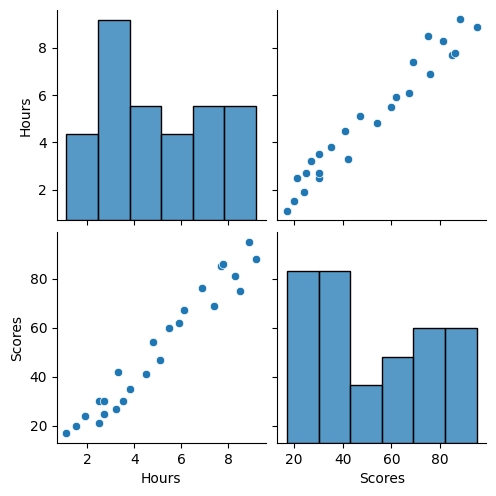

In [10]:
sns.pairplot(df)

In [15]:
pd.DataFrame({"p-value":[st.shapiro(df[c]).pvalue for c in df]}, index=df.columns)



,p-value
Hours,0.149119
Scores,0.043438


In [16]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [46]:

X = df[feat].to_numpy()
y = df[target].to_numpy()
X = X.reshape(-1, 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2023)

In [48]:
first_model= LinearRegression()
first_model.fit(X,y)

LinearRegression()

In [50]:
yp0 = first_model.predict(X)


array([2.04080061, 4.57528828, 2.62568238, 7.30473653, 2.91812327,
       1.94332032, 8.57198037, 5.84253211, 7.8896183 , 2.43072179,
       8.27953948, 6.0374927 , 3.99040651, 4.0878868 , 1.65087943,
       9.25434243, 2.91812327, 2.3332415 , 6.52489418, 6.71985477,
       2.91812327, 5.25765034, 3.40552474, 7.40221683, 8.37701978])

In [51]:
[first_model.score(X,y), st.pearsonr(y,yp0).statistic**2]


[0.9529481969048356, 0.9529481969048356]

In [54]:
[np.mean((y-yp0)**2), mean_squared_error(y,yp0)]

[0.2880067216464749, 0.2880067216464749]

Text(0, 0.5, 'Godziny')

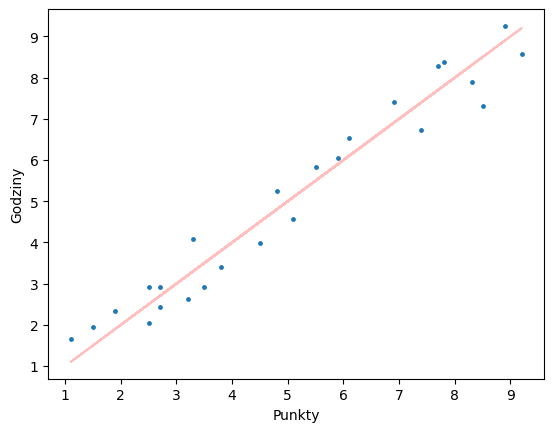

In [53]:
plt.plot(y,y,color="red", alpha=0.25)
plt.scatter(y,yp0, s=6)
plt.xlabel("Punkty")
plt.ylabel("Godziny")
